In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 미리 정의된 스일(테마)를 적용
plt.style.use('seaborn')
sns.set(font_scale=1.5)

# 한글
import pandas as pd
import seaborn as sns

# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 

# 결측치 데이터를 파악하는데 직관적인 도움을 주는 패키지
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 파일 불러오기
df_train = pd.read_csv("./Data/movie/movies_train.csv")
df_test = pd.read_csv("./Data/movie/movies_test.csv")


## 데이터 설명
#### movies_train.csv / movies_test.csv
- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [3]:
# 데이터를 확인합니다.
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
# 데이터 확인 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


### Data Preprocessing

In [5]:
# 데이터전처리 - 결측치가 너무 많은 데이터 제거
df_train = df_train.drop(['dir_prev_bfnum'], axis=1)
df_test = df_test.drop(['dir_prev_bfnum'], axis=1)

In [6]:
# 의미 없는 데이터 제거 (감독명, 제목)
df_train = df_train.drop(['director', 'title'], axis=1)
df_test = df_test.drop(['director', 'title'], axis=1)

In [7]:
df_train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [8]:
# 상위 5개사의 배급사를 제외하고 '기타'로 처리 
distributor_list = df_train.distributor.value_counts()[:5]

def func(distributor):
    if distributor in distributor_list:
        return distributor 
    else: 
        return "기타"

# lambda 매개변수 : 표현식 
df_train['distributor'] = df_train['distributor'].apply(lambda x : func(x))
df_test['distributor'] = df_test['distributor'].apply(lambda x : func(x))

In [9]:
#release time : 년, 월 변수 생성

df_train['년'] = df_train['release_time'].apply(lambda x: int(x[:4]))
df_train['월'] = df_train['release_time'].apply(lambda x: int(x[5:7]))
# 삭제 
df_train = df_train.drop(['release_time'],axis = 1)

df_test['년'] = df_test['release_time'].apply(lambda x: int(x[:4]))
df_test['월'] = df_test['release_time'].apply(lambda x: int(x[5:7]))
#삭제
df_test =  df_test.drop(['release_time'],axis = 1)

In [10]:
# 확인
df_train.sample(5)

,distributor,genre,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,년,월
586,기타,드라마,83,12세 관람가,0,2,4,4550,2013,12
55,(주)쇼박스,드라마,120,15세 관람가,1,279,2,986287,2012,1
538,기타,드라마,99,12세 관람가,0,117,4,3523,2014,4
529,기타,멜로/로맨스,88,청소년 관람불가,2,22,2,426,2015,10
112,(주)쇼박스,느와르,133,청소년 관람불가,1,308,2,4720050,2012,2


### Data EDA

In [11]:
# 기초 통계량 확인 
df_train.describe()

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,100.863333,0.876667,151.118333,3.706667,7.081818e+05,2012.748333,7.011667
std,18.097528,1.183409,165.654671,2.446889,1.828006e+06,1.727224,3.394712
min,45.000000,0.000000,0.000000,0.000000,1.000000e+00,2010.000000,1.000000
25%,89.000000,0.000000,17.000000,2.000000,1.297250e+03,2011.000000,4.000000
50%,100.000000,0.000000,82.500000,3.000000,1.259100e+04,2013.000000,7.000000
75%,114.000000,2.000000,264.000000,4.000000,4.798868e+05,2014.000000,10.000000
max,180.000000,5.000000,869.000000,25.000000,1.426277e+07,2015.000000,12.000000


In [12]:
# 데이터 타입 확인 
df_train.dtypes

distributor      object
genre            object
time              int64
screening_rat    object
dir_prev_num      int64
num_staff         int64
num_actor         int64
box_off_num       int64
년                 int64
월                 int64
dtype: object

In [13]:
# 수치형 과 카테고리형 분리 

numeric_feature = df_train.columns[(df_train.dtypes==int) | (df_train.dtypes== float)]
categorical_feature = df_train.columns[df_train.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년', '월']
카테고리형 데이터는 다음과 같습니다. 
 ['distributor', 'genre', 'screening_rat']


In [14]:
# 수치형 과 카테고리형 재정의

target = ['box_off_num']
numeric_feature = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
categorical_feature =  ['distributor', 'genre', 'screening_rat', '년', '월']

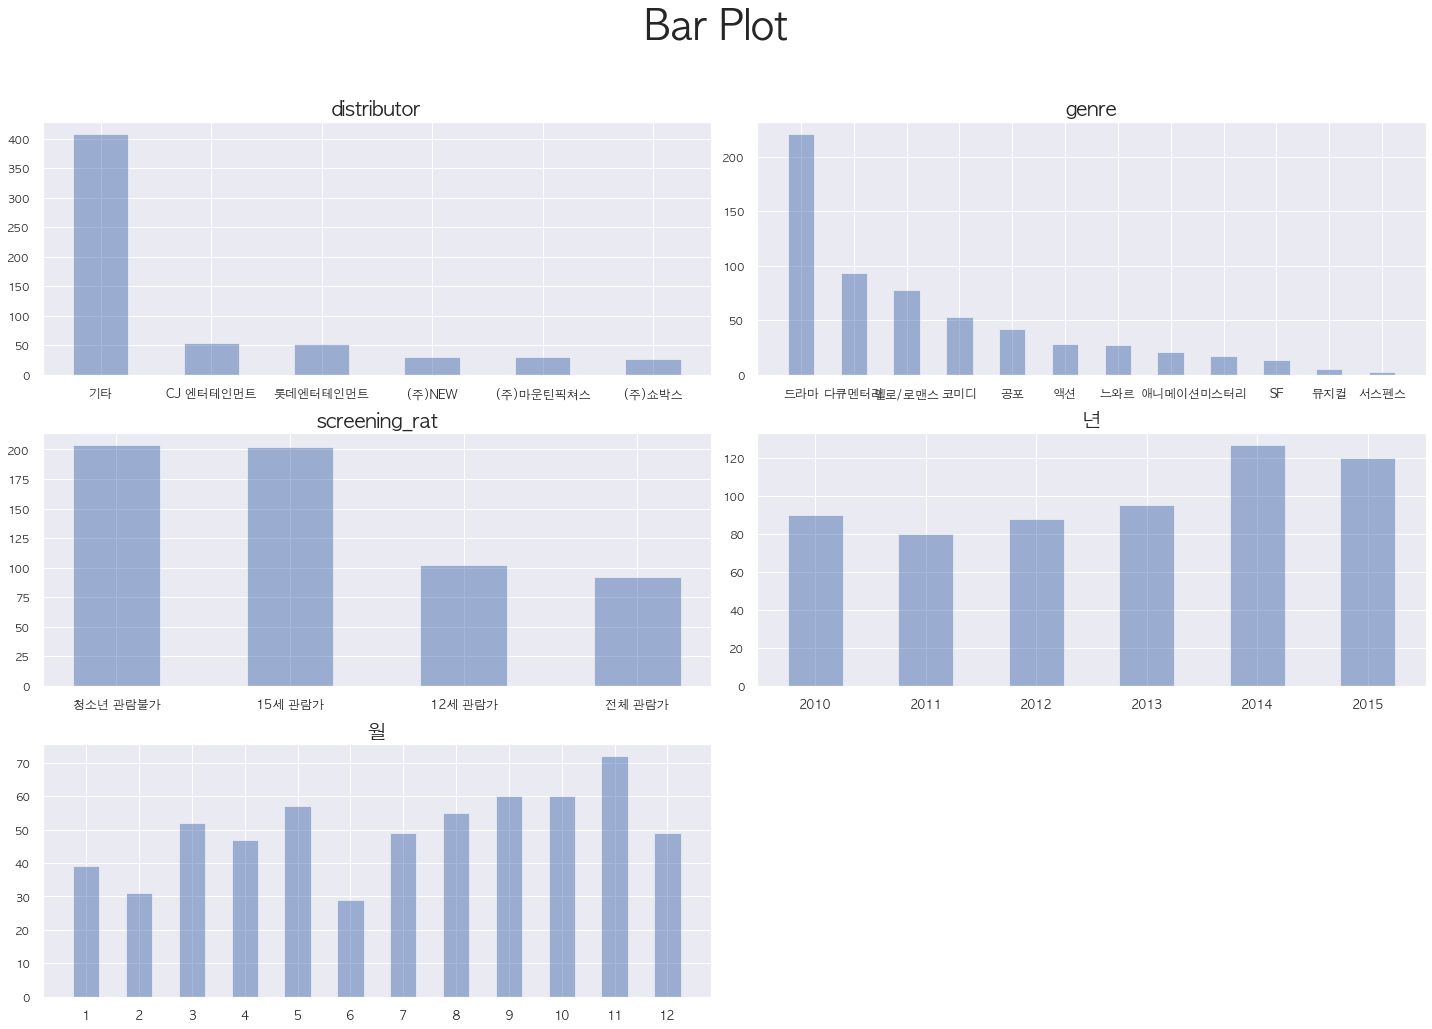

In [15]:
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = df_train[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 배급사 : Top 5는 거의 비등비등함 
# 드라마 장르 많음 
# 청불, 15세가 많음 
# 14 ~ 15년도에 많음 
# 11월 5월 3월 


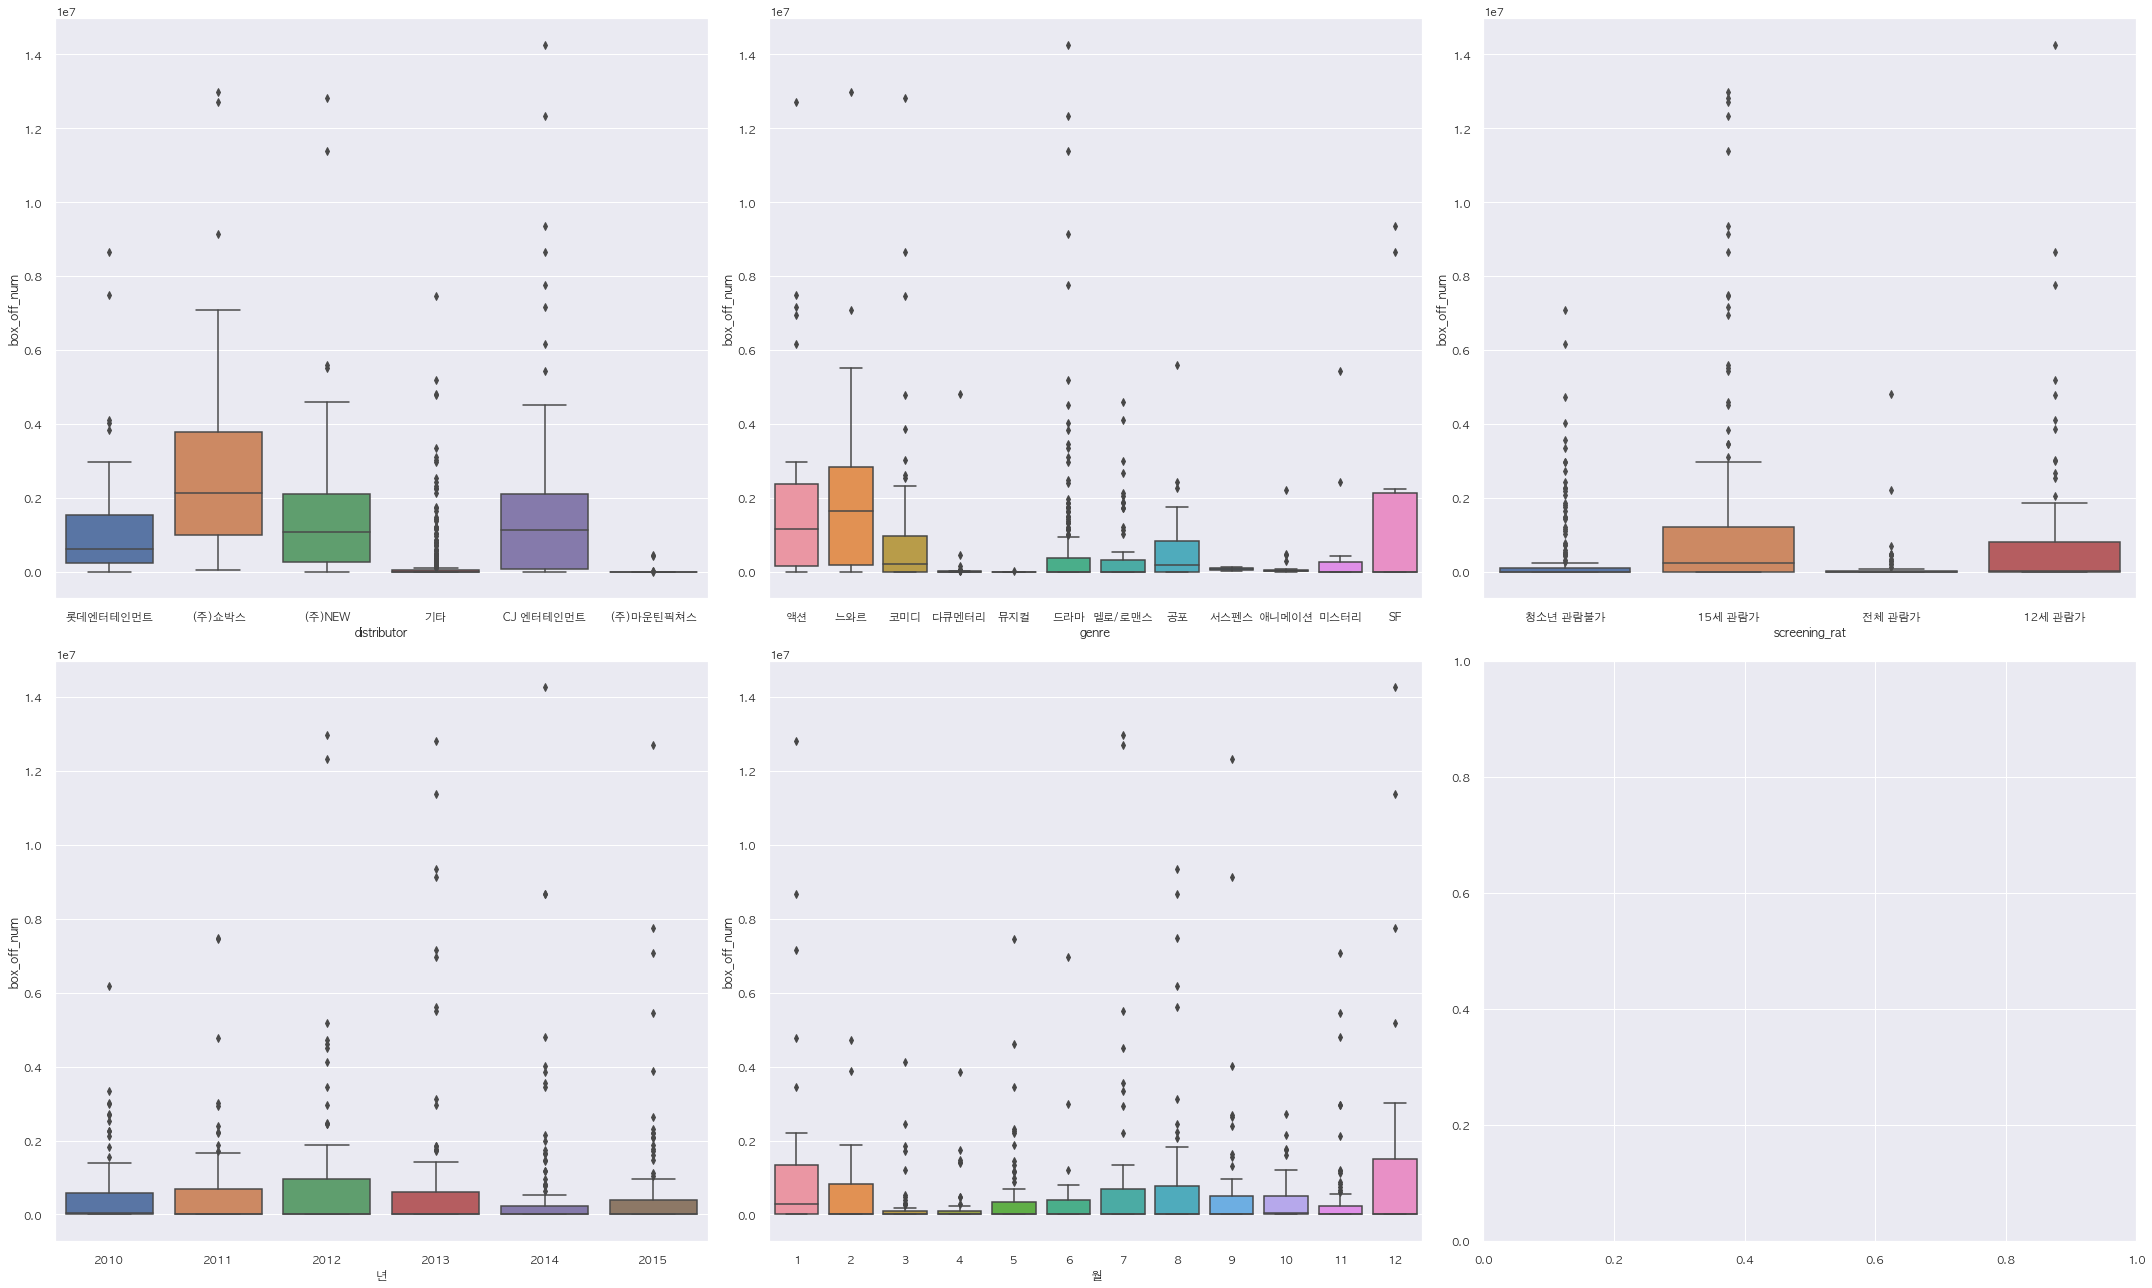

In [16]:
li_cat_feats = list(categorical_feature)
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*10,nr_rows*9))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["box_off_num"], data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

# distributor, scrrening_rate

<AxesSubplot:title={'center':'Correlation of Numeric Features with box_off_num'}>

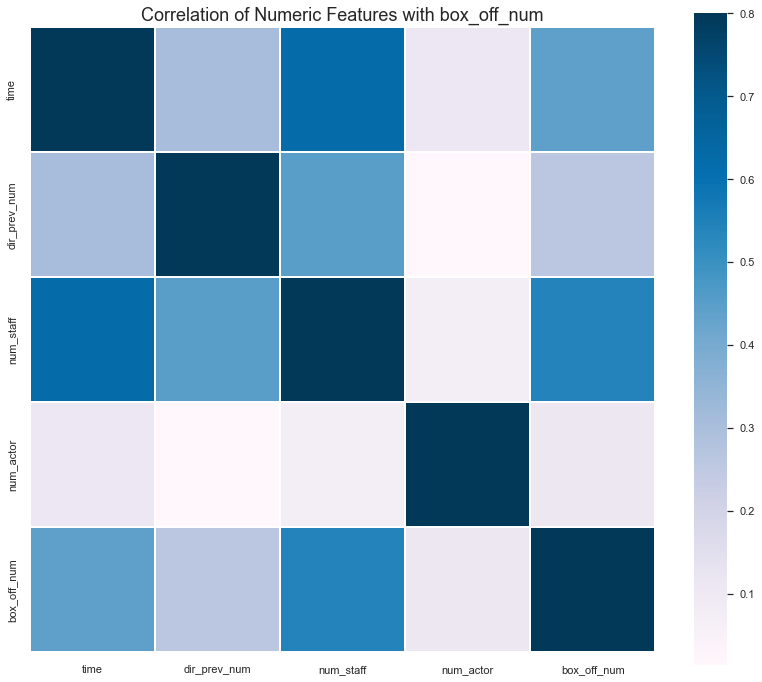

In [17]:
# Correlation Heat Map
corr_data = df_train[['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num']]

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with box_off_num',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

# time, num_staff

#### 상관관계 분석

In [18]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

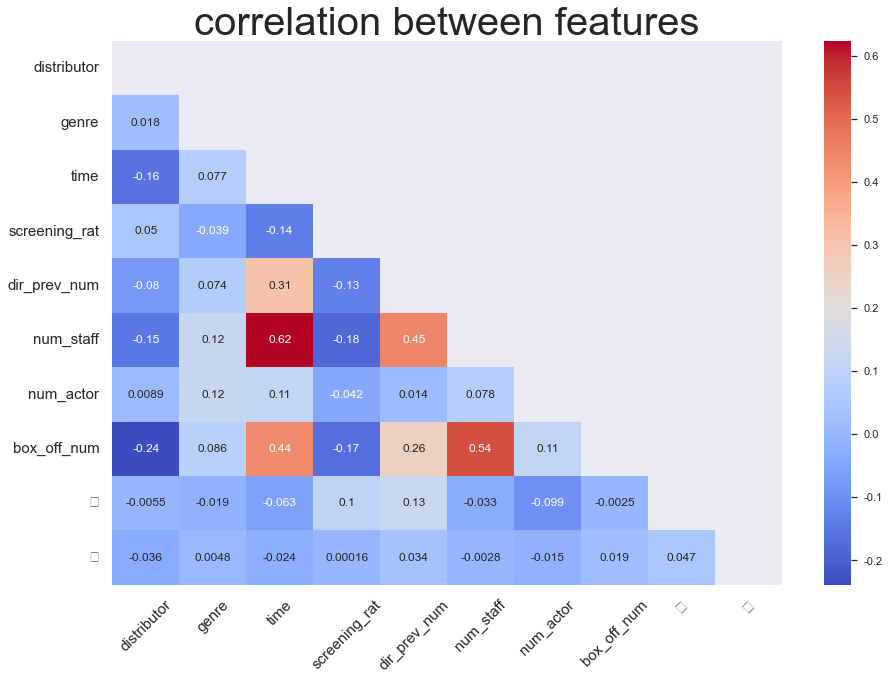

In [19]:
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table) 
mask[np.triu_indices_from(mask)]= True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# bos_off_num와 높은 상관 관계를 띄는 features 
# distributor, time, num_staff, screening_rat

#### 모델 정의

In [23]:
# 원핫 인코딩 
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

In [26]:
# 데이터 정의

train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=777)